<a href="https://colab.research.google.com/github/mueller14003/PH150/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physics 150 
# Lab #10 - Moment of Inertia


**Group 4:**
* Kyle Mueller
* Sam Fataua
* Makenzy Pharis

The predicted moment of inertia for a rectangular rod can be calculated from:

$$I_{pred}=Mh^{2}+\frac{1}{12}ML^{2}$$

where L and M are the total length and mass of the rectangular rod, respectively. h is shown in Figure 1 above.

An experimental value can be computed by measuring the speed of the rod at the bottom of its arc using the photogate. In the gate mode, you can measure the time that the ruler blocks the photogate. The velocity will be equal to the width of the ruler divided by the time blocked. The angular velocity of the rod at the bottom can then be computed from:

$$v=\omega{}r$$

An experimental value for the moment of inertia can be calculated from the conservation of energy equation:

$$Mgh=\frac{1}{2}I_{exp}\omega{}^{2}$$

where $g=9.80 \pm{} 0.01\ m/s^{2}$

Vary the position of the pivot (Point P in Fig. 1) and collect a total of 9 data points.

The uncertainties can be calculated using the equations in the table below.

| Equation                | Uncertainty                                     |
|-------------------------|-------------------------------------------------|
| $v=\frac{w}{t}$ | $\frac{\delta{}v}{v}=\sqrt{(\frac{\delta{}w}{w})^{2}(\frac{\delta{}t}{t})^{2}}$ |
| $\omega{}=\frac{v}{r}$ | $\frac{\delta{}w}{w}=\sqrt{(\frac{\delta{}v}{v})^{2}+(\frac{\delta{}r}{r})^{2}}$ |
| $I_{exp}=\frac{2Mgh}{\omega{}^{2}}$ | $\frac{\delta{}I_{exp}}{I_{exp}}=\sqrt{(\frac{\delta{}M}{M})^{2} + (\frac{\delta{}g}{g})^{2} + (\frac{\delta{}h}{h})^{2} + (2\frac{\delta{}\omega{}}{\omega{}})^{2}}$ |


1. (40 pts) Use propogation of errors to determine the uncertainty in your $I_{exp}$ values. In a Jupyter Notebook, make a table that gives values for: $h$, $t$, $v$, $\delta{}v$, $\omega{}$, $\delta{}\omega{}$, $I_{exp}$, $\delta{}I_{exp}$, and $I_{pred}$.

In [45]:
M = 0.1232 # kg
δM = 0.0001 # kg

g = 9.80 # m/s^2
δg = 0.01 # m/s^2

L = 1 # m

predict_I = lambda h: M*h**2 + (1/12)*M*L**2

hl = [0.45,0.40,0.35,0.30,0.25,0.20,0.15,0.10,0.05] # m
δhl = [0.001]*9 # m

vl = [5.051955513,4.956629276,4.755111694,4.436557293,4.124561787,3.7509377,3.265839338,2.635393381,1.81028235] # m/s
# Determined by taking multiple measurements at one h value
δvl = [.1]*9 # m/s

rl = [0.925,0.895,0.840,0.780,0.730,0.685,0.63,0.58,0.54] # m
δrl = [0.001]*9 # m

ωl = [*map(lambda v,r:v/r,vl,rl)] # s^-1
δωl = [*map(lambda v,δv,r,δr,ω: ω*((δv/v)**2+(δr/r)**2)**0.5, vl,δvl,rl,δrl,ωl)] # s^-1

I_exp = [*map(lambda h,ω: (2*M*g*h)/(ω**2), hl,ωl)] # kg m^2
δI_exp = [*map(lambda h,δh,ω,δω,Ie: Ie*((δM/M)**2+(δg/g)**2+(δh/h)**2+(2*(δω/ω))**2)**0.5, hl,δhl,ωl,δωl,I_exp)] # kg m^2

I_pred = [*map(predict_I,hl)] # kg m^2

In [46]:
from IPython.display import Markdown

header = "| $h\ (m)$ | $v\ (m/s)$ | $\delta{}v\ (m/s)$ | $\omega{}\ (s^{-1}$) | $\delta{}\omega{}\ (s^{-1}$) | $I_{exp}\ (kg\cdot m^{2})$ | $\delta{}I_{exp}\ (kg\cdot m^{2})$ | $I_{pred}\ (kg\cdot m^{2})$ |\n|-:|-:|-:|-:|-:|-:|-:|-:|\n"

body = '\n'.join([*map(lambda h,v,δv,ω,δω,Ie,δIe,Ip:f"|{h:0.2f}|{v:0.1f}|{δv:0.1f}|{ω:0.1f}|{δω:0.1f}|{Ie:0.3f}|{δIe:0.3f}|{Ip:0.3f}|", hl,vl,δvl,ωl,δωl,I_exp,δI_exp,I_pred)])

Markdown(header + body)

| $h\ (m)$ | $v\ (m/s)$ | $\delta{}v\ (m/s)$ | $\omega{}\ (s^{-1}$) | $\delta{}\omega{}\ (s^{-1}$) | $I_{exp}\ (kg\cdot m^{2})$ | $\delta{}I_{exp}\ (kg\cdot m^{2})$ | $I_{pred}\ (kg\cdot m^{2})$ |
|-:|-:|-:|-:|-:|-:|-:|-:|
|0.45|5.1|0.1|5.5|0.1|0.036|0.001|0.035|
|0.40|5.0|0.1|5.5|0.1|0.031|0.001|0.030|
|0.35|4.8|0.1|5.7|0.1|0.026|0.001|0.025|
|0.30|4.4|0.1|5.7|0.1|0.022|0.001|0.021|
|0.25|4.1|0.1|5.7|0.1|0.019|0.001|0.018|
|0.20|3.8|0.1|5.5|0.1|0.016|0.001|0.015|
|0.15|3.3|0.1|5.2|0.2|0.013|0.001|0.013|
|0.10|2.6|0.1|4.5|0.2|0.012|0.001|0.011|
|0.05|1.8|0.1|3.4|0.2|0.011|0.001|0.011|

2. (50 pts) Make a plot of $I_{pred}$ and $I_{exp}$ vs. $h$ on the same graph. Show error bars for $I_{exp}$ values. Properly label your axes. The $I_{pred}$ vs. $h$ will be a solid line and the $I_{exp}$ vs. $h$ will be discrete points.

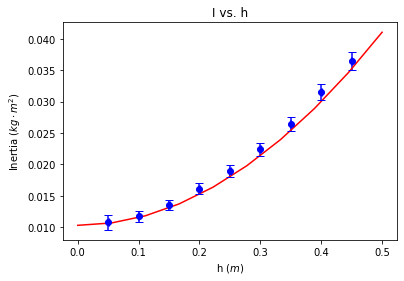

In [58]:
# Import libraries
from pylab import plot, show, xlabel, ylabel, figure, axes, title
import numpy as np

h = np.linspace(0, 0.50, 10)
Ip = predict_I(h)

ax = axes()
ax.plot(h,Ip,'r')
ax.errorbar(hl, I_exp, xerr = δhl, yerr = δI_exp, fmt = 'bo', capsize = 4)
xlabel('h $(m)$')
ylabel('Inertia $(kg\cdot m^2)$')
title('I vs. h')

plt.show()

3. (10 pts) Explain any discrepancy between the predicted and the experimental values.